In [51]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

torch.__version__

'2.3.0+cu121'

In [52]:
!nvidia-smi

Mon Jul 15 05:14:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Generating data



In [53]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [54]:
len(train_data), len(test_data)

(60000, 10000)

In [55]:
image, target = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [56]:
classnames = train_data.classes

In [57]:
class_idx = train_data.class_to_idx
class_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [58]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [59]:
import matplotlib.pyplot as plt

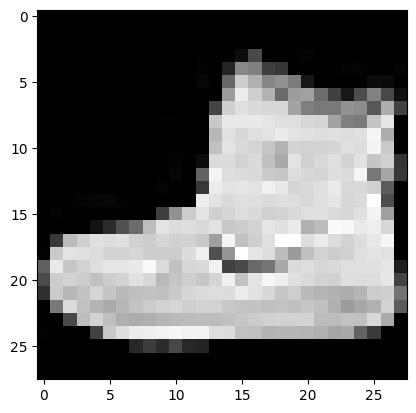

In [60]:
plt.imshow(image.squeeze(),cmap="gray")

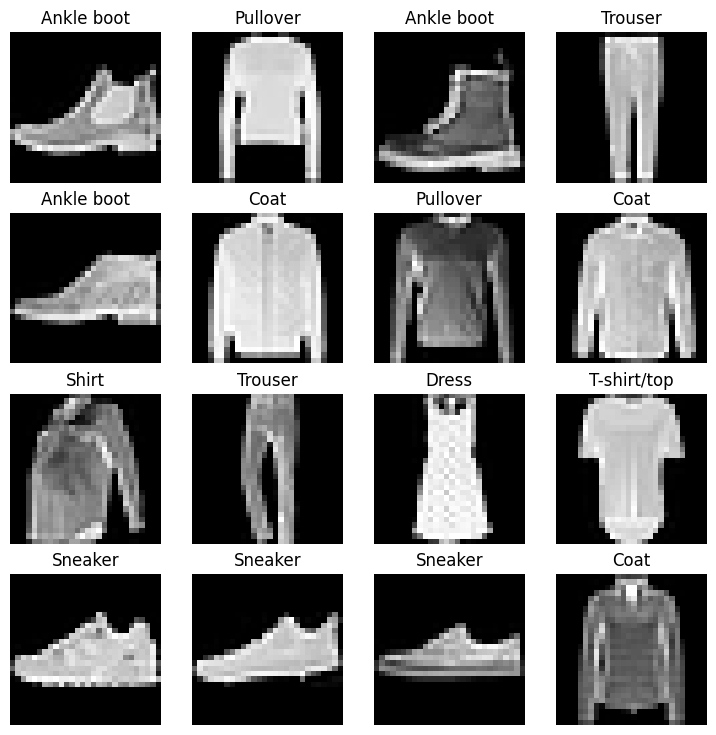

In [66]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
row, col = 4,4
for i in range(1,row*col+1):
  im_index = torch.randint(0,len(train_data),size=[1]).item()
  im, la = train_data[im_index]
  fig.add_subplot(row, col, i)
  plt.imshow(im.squeeze(), cmap="gray")
  plt.title(classnames[la])
  plt.axis(False);